<a href="https://colab.research.google.com/github/PhanQuangHuy123/B-i-1_AI_-Phan-Quang-Huy-20146254/blob/main/Project1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt
from keras.layers import LeakyReLU
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Conv2D, MaxPooling2D, Flatten
from keras.utils import to_categorical
from keras.models import load_model
from keras.utils import load_img, img_to_array
import os
from keras.preprocessing.image import ImageDataGenerator

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
model = Sequential()
model.add(Conv2D(32, kernel_size = (3,3), activation = 'relu', input_shape = (200,200,3), padding = 'same')) 
model.add(LeakyReLU(alpha = 0.1))
model.add(MaxPooling2D(2,2))

model.add(Conv2D(64, kernel_size = (3,3), activation = 'relu', padding = 'same'))
model.add(LeakyReLU(alpha=0.1)) 
model.add(MaxPooling2D(2,2))

model.add(Conv2D(128, kernel_size = (3,3), activation = 'relu', padding = 'same')) 
model.add(LeakyReLU(alpha = 0.1))
model.add(MaxPooling2D(2,2))

model.add(Flatten())
model.add(Dense(128, activation = 'relu'))
model.add(LeakyReLU(alpha = 0.1))
model.add(Dense(7, activation = 'softmax'))

model.compile(loss = 'categorical_crossentropy', optimizer = 'Adam', metrics = ['accuracy'])
model.summary()


Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 200, 200, 32)      896       
                                                                 
 leaky_re_lu_12 (LeakyReLU)  (None, 200, 200, 32)      0         
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 100, 100, 32)     0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 100, 100, 64)      18496     
                                                                 
 leaky_re_lu_13 (LeakyReLU)  (None, 100, 100, 64)      0         
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 50, 50, 64)       0         
 g2D)                                                 

In [ ]:
train_data = ImageDataGenerator(rescale = 1./255, shear_range = 0.2, zoom_range = 0.2, horizontal_flip = True)
     

In [ ]:
training_set = train_data.flow_from_directory('/content/drive/MyDrive/Xe máy', target_size = (200,200), batch_size = 32,class_mode ='categorical')

Found 210 images belonging to 7 classes.


In [ ]:
training_set.class_indices

{'Airblade': 0,
 'SH': 1,
 'Vario': 2,
 'Vespa': 3,
 'Vision': 4,
 'Winner': 5,
 'Winner X': 6}

In [ ]:
train = model.fit(training_set, epochs = 100, batch_size = 128, verbose = 1)

Epoch 1/100
7/7 [==============================] - 19s 3s/step - loss: 4.2142 - accuracy: 0.1714
Epoch 2/100
7/7 [==============================] - 17s 2s/step - loss: 1.9625 - accuracy: 0.1571
Epoch 3/100
7/7 [==============================] - 17s 2s/step - loss: 1.9557 - accuracy: 0.1571
Epoch 4/100
7/7 [==============================] - 17s 2s/step - loss: 1.9377 - accuracy: 0.1762
Epoch 5/100
7/7 [==============================] - 17s 2s/step - loss: 1.9177 - accuracy: 0.2571
Epoch 6/100
7/7 [==============================] - 17s 2s/step - loss: 1.8505 - accuracy: 0.3048
Epoch 7/100
7/7 [==============================] - 18s 2s/step - loss: 1.7386 - accuracy: 0.3762
Epoch 8/100
7/7 [==============================] - 17s 2s/step - loss: 1.6108 - accuracy: 0.4286
Epoch 9/100
7/7 [==============================] - 18s 3s/step - loss: 1.6687 - accuracy: 0.4333
Epoch 10/100
7/7 [==============================] - 17s 2s/step - loss: 1.5936 - accuracy: 0.3952
Epoch 11/100
7/7 [===========

In [ ]:
Score = model.evaluate(training_set, verbose = 0)
print('Ham mat mat', Score[0])
print('Do chinh xac', Score[1])

Ham mat mat 0.004889593459665775
Do chinh xac 0.9952380657196045


In [ ]:
model.save('Projectcuoiky.h5')
model_CNN = load_model('Projectcuoiky.h5')

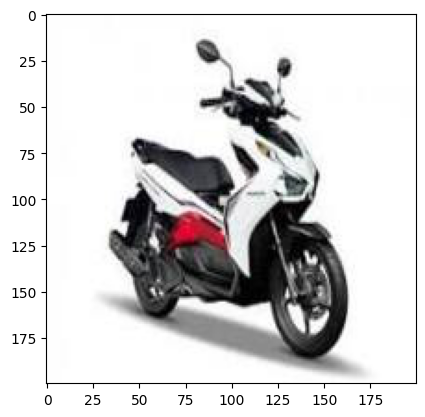

1/1 [==============================] - 0s 70ms/step
Airblade


In [ ]:
filename = "/content/drive/MyDrive/Xe máy_test/Airblade  .jpg"
img = load_img(filename,target_size = (200,200))
img_show = plt.imshow(img)
plt.show()
img = img_to_array(img)
img = img.reshape(1,200,200,3)
img = img.astype('float32')
img = img/255
kq= np.argmax(model_CNN.predict(img),axis=-1)
#result = (model_CNN.predict(img).argmax())
if(kq == 0):
    print("Airblade")
if(kq == 1):
    print("SH")
if(kq == 2):
    print("Vario")
if(kq == 3):
    print("Vespa")
if(kq == 4):
    print("Vision")
if(kq == 5):
    print("Winner")
if(kq == 6):
    print("Winner X")            

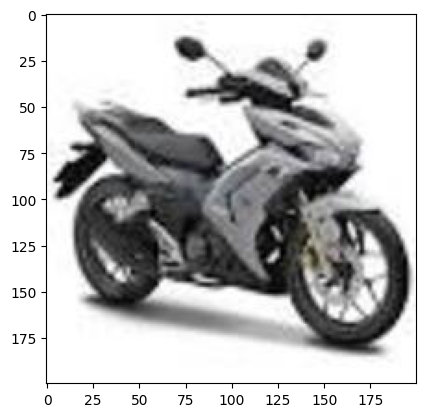

1/1 [==============================] - 0s 65ms/step
Winner X


In [ ]:
filename = "/content/drive/MyDrive/Xe máy_test/Winner X(1).jpg"
img = load_img(filename,target_size = (200,200))
img_show = plt.imshow(img)
plt.show()
img = img_to_array(img)
img = img.reshape(1,200,200,3)
img = img.astype('float32')
img = img/255
kq= np.argmax(model_CNN.predict(img),axis=-1)
#result = (model_CNN.predict(img).argmax())
if(kq == 0):
    print("Airblade")
if(kq == 1):
    print("SH")
if(kq == 2):
    print("Vario")
if(kq == 3):
    print("Vespa")
if(kq == 4):
    print("Vision")
if(kq == 5):
    print("Winner")
if(kq == 6):
    print("Winner X")            

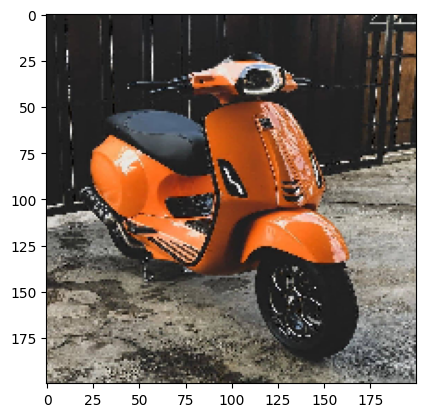

1/1 [==============================] - 0s 91ms/step
Vespa


In [ ]:
filename = "/content/Vespa 150cc Scooters - Top 5 Vespa Scooters.jpg"
img = load_img(filename,target_size = (200,200))
img_show = plt.imshow(img)
plt.show()
img = img_to_array(img)
img = img.reshape(1,200,200,3)
img = img.astype('float32')
img = img/255
kq= np.argmax(model_CNN.predict(img),axis=-1)
#result = (model_CNN.predict(img).argmax())
if(kq == 0):
    print("Airblade")
if(kq == 1):
    print("SH")
if(kq == 2):
    print("Vario")
if(kq == 3):
    print("Vespa")
if(kq == 4):
    print("Vision")
if(kq == 5):
    print("Winner")
if(kq == 6):
    print("Winner X")  

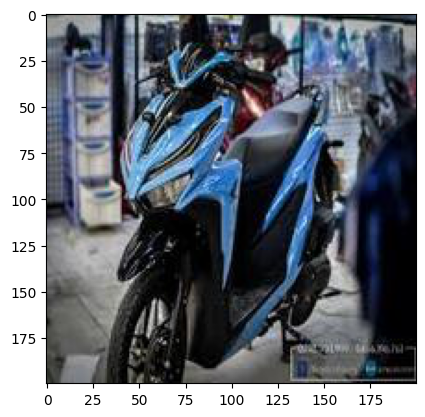

1/1 [==============================] - 0s 38ms/step
Vario


In [ ]:
filename = "/content/drive/MyDrive/Xe máy_test/Vario.jpg"
img = load_img(filename,target_size = (200,200))
img_show = plt.imshow(img)
plt.show()
img = img_to_array(img)
img = img.reshape(1,200,200,3)
img = img.astype('float32')
img = img/255
kq= np.argmax(model.predict(img),axis=-1)
result = (model_CNN.predict(img).argmax())
if(kq == 0):
    print("Airblade")
if(kq == 1):
    print("SH")
if(kq == 2):
    print("Vario")
if(kq == 3):
    print("Vespa")
if(kq == 4):
    print("Vision")
if(kq == 5):
    print("Winner")
if(kq == 6):
    print("Winner X") 

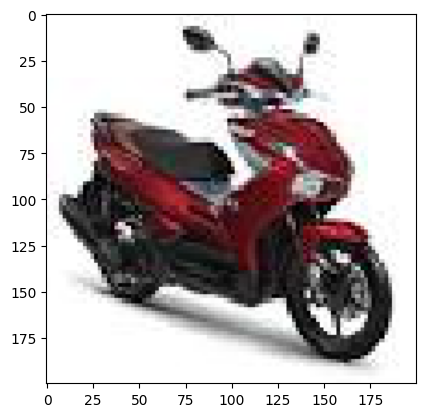

1/1 [==============================] - 0s 87ms/step
Airblade


In [ ]:
filename = "/content/images.jpg"
img = load_img(filename,target_size = (200,200))
img_show = plt.imshow(img)
plt.show()
img = img_to_array(img)
img = img.reshape(1,200,200,3)
img = img.astype('float32')
img = img/255
kq= np.argmax(model.predict(img),axis=-1)
result = (model_CNN.predict(img).argmax())
if(kq == 0):
    print("Airblade")
if(kq == 1):
    print("SH")
if(kq == 2):
    print("Vario")
if(kq == 3):
    print("Vespa")
if(kq == 4):
    print("Vision")
if(kq == 5):
    print("Winner")
if(kq == 6):
    print("Winner X") 

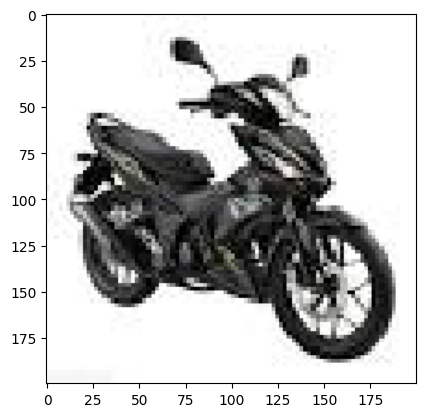

1/1 [==============================] - 0s 127ms/step
Winner


In [ ]:
filename = "/content/images (1).jpg"
img = load_img(filename,target_size = (200,200))
img_show = plt.imshow(img)
plt.show()
img = img_to_array(img)
img = img.reshape(1,200,200,3)
img = img.astype('float32')
img = img/255
kq= np.argmax(model.predict(img),axis=-1)
result = (model_CNN.predict(img).argmax())
if(kq == 0):
    print("Airblade")
if(kq == 1):
    print("SH")
if(kq == 2):
    print("Vario")
if(kq == 3):
    print("Vespa")
if(kq == 4):
    print("Vision")
if(kq == 5):
    print("Winner")
if(kq == 6):
    print("Winner X") 

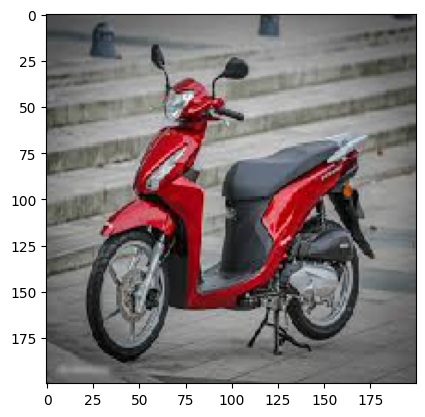

1/1 [==============================] - 0s 91ms/step
Vision


In [ ]:
filename = "/content/images (3).jpg"
img = load_img(filename,target_size = (200,200))
img_show = plt.imshow(img)
plt.show()
img = img_to_array(img)
img = img.reshape(1,200,200,3)
img = img.astype('float32')
img = img/255
kq= np.argmax(model.predict(img),axis=-1)
result = (model_CNN.predict(img).argmax())
if(kq == 0):
    print("Airblade")
if(kq == 1):
    print("SH")
if(kq == 2):
    print("Vario")
if(kq == 3):
    print("Vespa")
if(kq == 4):
    print("Vision")
if(kq == 5):
    print("Winner")
if(kq == 6):
    print("Winner X") 

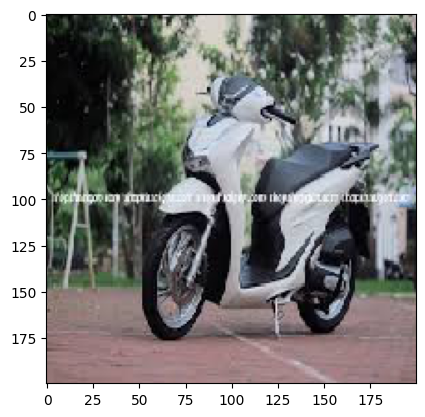

1/1 [==============================] - 0s 79ms/step
SH


In [ ]:
filename = "/content/images (5).jpg"
img = load_img(filename,target_size = (200,200))
img_show = plt.imshow(img)
plt.show()
img = img_to_array(img)
img = img.reshape(1,200,200,3)
img = img.astype('float32')
img = img/255
kq= np.argmax(model.predict(img),axis=-1)
result = (model_CNN.predict(img).argmax())
if(kq == 0):
    print("Airblade")
if(kq == 1):
    print("SH")
if(kq == 2):
    print("Vario")
if(kq == 3):
    print("Vespa")
if(kq == 4):
    print("Vision")
if(kq == 5):
    print("Winner")
if(kq == 6):
    print("Winner X") 

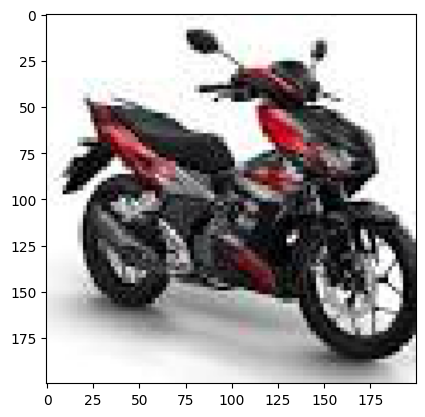

1/1 [==============================] - 0s 109ms/step
Winner X


In [ ]:
filename = "/content/download.jpg"
img = load_img(filename,target_size = (200,200))
img_show = plt.imshow(img)
plt.show()
img = img_to_array(img)
img = img.reshape(1,200,200,3)
img = img.astype('float32')
img = img/255
kq= np.argmax(model.predict(img),axis=-1)
result = (model_CNN.predict(img).argmax())
if(kq == 0):
    print("Airblade")
if(kq == 1):
    print("SH")
if(kq == 2):
    print("Vario")
if(kq == 3):
    print("Vespa")
if(kq == 4):
    print("Vision")
if(kq == 5):
    print("Winner")
if(kq == 6):
    print("Winner X") 

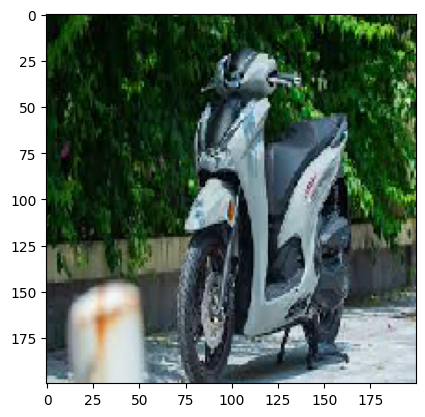

1/1 [==============================] - 0s 117ms/step
SH


In [ ]:
filename = "/content/images (6).jpg"
img = load_img(filename,target_size = (200,200))
img_show = plt.imshow(img)
plt.show()
img = img_to_array(img)
img = img.reshape(1,200,200,3)
img = img.astype('float32')
img = img/255
kq= np.argmax(model.predict(img),axis=-1)
result = (model_CNN.predict(img).argmax())
if(kq == 0):
    print("Airblade")
if(kq == 1):
    print("SH")
if(kq == 2):
    print("Vario")
if(kq == 3):
    print("Vespa")
if(kq == 4):
    print("Vision")
if(kq == 5):
    print("Winner")
if(kq == 6):
    print("Winner X") 

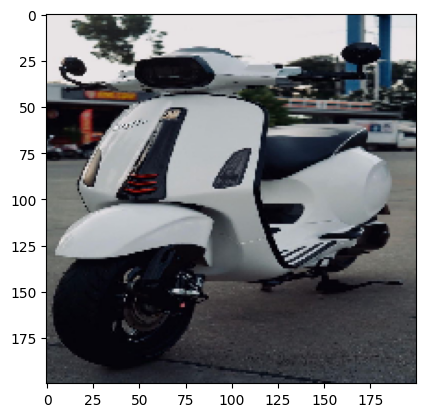

1/1 [==============================] - 0s 131ms/step
Vespa


In [ ]:
filename = "/content/Koleksi.jpg"
img = load_img(filename,target_size = (200,200))
img_show = plt.imshow(img)
plt.show()
img = img_to_array(img)
img = img.reshape(1,200,200,3)
img = img.astype('float32')
img = img/255
kq= np.argmax(model.predict(img),axis=-1)
result = (model_CNN.predict(img).argmax())
if(kq == 0):
    print("Airblade")
if(kq == 1):
    print("SH")
if(kq == 2):
    print("Vario")
if(kq == 3):
    print("Vespa")
if(kq == 4):
    print("Vision")
if(kq == 5):
    print("Winner")
if(kq == 6):
    print("Winner X") 

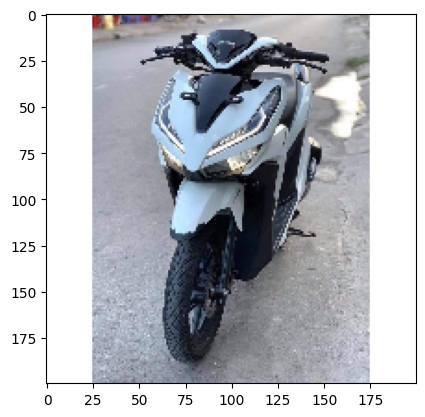

1/1 [==============================] - 0s 57ms/step
Vario


In [ ]:
filename = "/content/Vario(1).jpg"
img = load_img(filename,target_size = (200,200))
img_show = plt.imshow(img)
plt.show()
img = img_to_array(img)
img = img.reshape(1,200,200,3)
img = img.astype('float32')
img = img/255
kq= np.argmax(model.predict(img),axis=-1)
result = (model_CNN.predict(img).argmax())
if(kq == 0):
    print("Airblade")
if(kq == 1):
    print("SH")
if(kq == 2):
    print("Vario")
if(kq == 3):
    print("Vespa")
if(kq == 4):
    print("Vision")
if(kq == 5):
    print("Winner")
if(kq == 6):
    print("Winner X") 

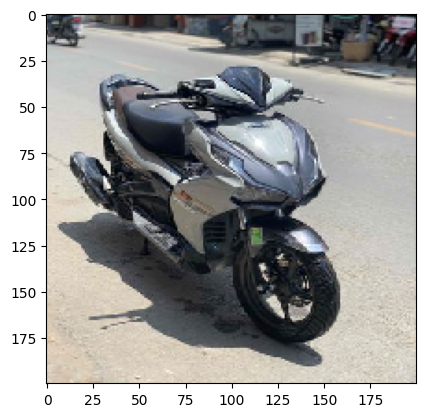

1/1 [==============================] - 0s 39ms/step
Airblade


In [ ]:
filename = "/content/A.jpg"
img = load_img(filename,target_size = (200,200))
img_show = plt.imshow(img)
plt.show()
img = img_to_array(img)
img = img.reshape(1,200,200,3)
img = img.astype('float32')
img = img/255
kq= np.argmax(model.predict(img),axis=-1)
result = (model_CNN.predict(img).argmax())
if(kq == 0):
    print("Airblade")
if(kq == 1):
    print("SH")
if(kq == 2):
    print("Vario")
if(kq == 3):
    print("Vespa")
if(kq == 4):
    print("Vision")
if(kq == 5):
    print("Winner")
if(kq == 6):
    print("Winner X") 